In [1]:
from growing_instability_lib import *

Using TensorFlow backend.


In [3]:
sample_sub = pd.read_csv('../data/sampleSubmission.csv')
topics = set(sample_sub.columns.difference(['id']))

topic2actual = {}
for i in sample_sub.columns:
    if 'id' == i:
        continue
    topic2actual[i] = segment(i)
    
len(topics)

160

In [6]:
# train_df = pd.read_json('../data/training_id_topics.json')
# valid_labels_df = train_df.topics.map(topics.intersection).reset_index()

In [7]:
# train_topics = reduce(lambda x, y: x.union(y), valid_labels_df.topics)

In [8]:
# %%time
# data = []
# index = []

# for ix, row in enumerate(valid_labels_df[valid_labels_df.topics.map(len) != 0].iterrows()):
#     _, row = row

#     index.append(row['index'])
#     data.append([1 if i in row.topics else np.nan for i in sorted(topics)])
    
#     if ix % 1000 == 0: print ix
        
# topic_train_index = pd.DataFrame(data, columns=sorted(topics), index=index)
# topic_train_index.head()

In [9]:
# topic_train_index.columns[topic_train_index.sum() == 3]

In [10]:
fs_model = fasttext.load_model('./corpus/models/model_train_body_data-with_labels_False-retain_special_chars_False.bin')

topic2actual
topic2vec = {}

for topic, actual in topic2actual.items():
    topic_vec = np.array(fs_model[' '.join(actual)])
    mean_topic_word_vec = np.array([fs_model[w] for w in actual if w not in ['and', 'in', 'of']]).mean(axis=0)
    topic2vec[topic] = dict(
        topic_vec=topic_vec,
        mean_topic_word_vec=mean_topic_word_vec
    )

topic2vec_df = pd.DataFrame(topic2vec).T

In [11]:
data = np.vstack(topic2vec_df.mean_topic_word_vec.values)

n_components = 10
n_delta = 10
topic_pca = PCA(n_components=n_components)
topic_pca.fit(data)

while topic_pca.explained_variance_ratio_.sum() < 0.90:
    n_components += n_delta
    topic_pca = PCA(n_components=n_components)
    topic_pca.fit(data)

In [13]:
# %%time

# ds = parse_training_data('../data/TrainingData/2014b_TrainingData.json', topics=topics)
# ds = pd.DataFrame(ds).T

# for t in topics.difference(ds.columns):
#     ds[t] = np.nan

In [14]:
%%time

# processed_tname = {
#     '../data/TrainingData/2003b_TrainingData.json',
#     '../data/TrainingData/2004b_TrainingData.json',
#     '../data/TrainingData/2005a_TrainingData.json',
# }
# nan_rows = set()
# target_columns = sorted(topics)
# trainingX = pd.DataFrame()
# trainingY = pd.DataFrame()

# for ix, tname in enumerate(glob.iglob('../data/TrainingData/*_TrainingData.json')):
#     print('Processing {}. {}...'.format(ix + 1, tname))

#     if ix <= 2 or tname in processed_tname:
#         continue

#     ds = parse_training_data(tname, topics=topics)
#     ds = pd.DataFrame(ds).T

#     for t in topics.difference(ds.columns):
#         ds[t] = np.nan

#     print('Done parsing {} docs with valid topics...'.format(ds.shape[0]))

#     print('Computing features...')
#     %time feature_vec = transform_text(ds.head(ts)).map(lambda x: np.array([fs_model[w] for w in x.split()]).mean(axis=0))

#     nan_rows.update(feature_vec[feature_vec.isnull()].index.values)

#     feature_vec = feature_vec[feature_vec.notnull()]

#     if trainingX.empty:
#         trainingX = feature_vec
#     else:
#         trainingX = trainingX.append(feature_vec)

#     print('Current training size is {}...'.format(trainingX.shape[0]))

#     targets = ds[target_columns].ix[feature_vec.index]  # .fillna(0).as_matrix()

#     if trainingY.empty:
#         trainingY = targets
#     else:
#         trainingY = trainingY.append(targets)

#     trainingX.to_hdf('training_data_2', 'trainingX_fasttext')
#     trainingY.to_hdf('training_data_2', 'trainingY_fasttext')
    
#     print('Completed extracting data from {}...'.format(tname))
#     print
#     processed_tname.add(tname)

# CPU times: user 3h 11min 14s, sys: 2min 32s, total: 3h 13min 47s
# Wall time: 3h 12min 7s

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


In [15]:
%%time
target_columns = sorted(topics)

trainingX = pd.read_hdf('training_data', 'trainingX_fasttext')
trainingY = pd.read_hdf('training_data', 'trainingY_fasttext')

CPU times: user 3.74 s, sys: 2.45 s, total: 6.19 s
Wall time: 7.59 s


In [18]:
sc = StandardScaler()

In [637]:
# %%time
# ts = 10000
# # feature_vec = transform_text(ds.head(100)).map(lambda x: fs_model[x])
# feature_vec = transform_text(ds.head(ts)).map(lambda x: np.array([fs_model[w] for w in x.split()]).mean(axis=0))

In [230]:
trainingX.ix[trainingX.index.str.contains('^201[0-4]')]

2012a_TrainingData_00032    [-0.00692703751691, 0.0131925829391, -0.089119...
2012a_TrainingData_00039    [0.0035624366887, 0.0022468659725, -0.10892507...
2012a_TrainingData_00042    [0.0104933364357, -0.0152433813058, -0.0976779...
2012a_TrainingData_00158    [0.00417700874113, -0.0146518261804, -0.109971...
2012a_TrainingData_00159    [0.0178861558763, -0.00213977157183, -0.089794...
2012a_TrainingData_00164    [-0.00215727231838, -0.029372796515, -0.104526...
2012a_TrainingData_00178    [-0.00167258449805, -0.00776067049913, -0.0987...
2012a_TrainingData_00198    [0.0103993472402, -0.00557831160293, -0.117735...
2012a_TrainingData_00203    [0.0170870022889, 0.0190197932512, -0.09403973...
2012a_TrainingData_00204    [0.0209888687456, 0.00754286840269, -0.0985630...
2012a_TrainingData_00205    [0.0384351295266, -0.0265857949472, -0.1022910...
2012a_TrainingData_00206    [0.0121699556043, -0.00836345299248, -0.093227...
2012a_TrainingData_00207    [0.0283674945273, 0.0111215487018, -

In [231]:
fv = trainingX[trainingX.notnull()]
fv = trainingX.ix[trainingX.index.str.contains('^201[0-4]')]

fv = fv[fv.notnull()]
sc.fit(np.vstack(fv))
fv.shape

(94114,)

In [232]:
train_index = sorted(fv.index)
np.random.shuffle(train_index)
train_index[:10]

[u'2010b_TrainingData_34968',
 u'2010a_TrainingData_08642',
 u'2014a_TrainingData_55697',
 u'2014a_TrainingData_53916',
 u'2013a_TrainingData_21558',
 u'2011b_TrainingData_49778',
 u'2010a_TrainingData_40048',
 u'2013a_TrainingData_08216',
 u'2014a_TrainingData_31996',
 u'2010b_TrainingData_06058']

In [233]:
(300 * 8) * 10000. * 33

792000000.0

In [234]:
# sims = cosine_similarity(
#     np.vstack(feature_vec), np.vstack(topic2vec_df.mean_topic_word_vec)
# )

# ix = 65
# print ds.iloc[ix][ds.iloc[ix].notnull()]
# for i in np.argsort(sims[ix])[::-1]:
#     print topic2vec_df.index[i], sims[ix][i]

In [235]:
kmodel = keras.models.Sequential()

kmodel.add(keras.layers.Dense(128, input_dim=300))
kmodel.add(keras.layers.Dropout(0.3))
kmodel.add(keras.layers.Activation('relu'))

kmodel.add(keras.layers.Dense(256))
kmodel.add(keras.layers.Dropout(0.5))
kmodel.add(keras.layers.Activation('relu'))

kmodel.add(keras.layers.Dense(128))
kmodel.add(keras.layers.Dropout(0.4))
kmodel.add(keras.layers.Activation('relu'))

kmodel.add(keras.layers.Dense(256))
kmodel.add(keras.layers.Dropout(0.4))
kmodel.add(keras.layers.Activation('relu'))


kmodel.add(keras.layers.Dense(len(topics)))  # , activity_regularizer=keras.regularizers.l1(1)))
kmodel.add(keras.layers.Activation('sigmoid'))

kmodel.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'],
)
kmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               38528     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
activation_39 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_40 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
__________

In [87]:
kmodel.reset_states()

In [237]:
%%time
kmodel.fit(
    sc.transform(np.vstack(fv.ix[train_index])),
    trainingY.ix[train_index].fillna(0).as_matrix(), batch_size=1000, epochs=100,
    validation_split=0.2,
)

Train on 75291 samples, validate on 18823 samples
Epoch 1/100
75291/75291 [==============================] - 1s - loss: 3.1780 - acc: 0.5180 - binary_crossentropy: 0.0230 - val_loss: 2.7548 - val_acc: 0.5772 - val_binary_crossentropy: 0.0196
Epoch 2/100
75291/75291 [==============================] - 1s - loss: 3.1326 - acc: 0.5224 - binary_crossentropy: 0.0227 - val_loss: 2.7186 - val_acc: 0.5815 - val_binary_crossentropy: 0.0190
Epoch 3/100
75291/75291 [==============================] - 1s - loss: 3.0959 - acc: 0.5310 - binary_crossentropy: 0.0225 - val_loss: 2.6880 - val_acc: 0.5819 - val_binary_crossentropy: 0.0186
Epoch 4/100
75291/75291 [==============================] - 1s - loss: 3.0751 - acc: 0.5314 - binary_crossentropy: 0.0224 - val_loss: 2.6901 - val_acc: 0.5821 - val_binary_crossentropy: 0.0186
Epoch 5/100
75291/75291 [==============================] - 1s - loss: 3.0376 - acc: 0.5350 - binary_crossentropy: 0.0222 - val_loss: 2.6471 - val_acc: 0.5853 - val_binary_crossentrop

75291/75291 [==============================] - 1s - loss: 2.6383 - acc: 0.5898 - binary_crossentropy: 0.0452 - val_loss: 2.3779 - val_acc: 0.6201 - val_binary_crossentropy: 0.0367
Epoch 86/100
75291/75291 [==============================] - 1s - loss: 2.6342 - acc: 0.5906 - binary_crossentropy: 0.0458 - val_loss: 2.3804 - val_acc: 0.6215 - val_binary_crossentropy: 0.0365
Epoch 87/100
75291/75291 [==============================] - 1s - loss: 2.6357 - acc: 0.5899 - binary_crossentropy: 0.0461 - val_loss: 2.3805 - val_acc: 0.6206 - val_binary_crossentropy: 0.0366
Epoch 88/100
75291/75291 [==============================] - 1s - loss: 2.6387 - acc: 0.5881 - binary_crossentropy: 0.0463 - val_loss: 2.3777 - val_acc: 0.6218 - val_binary_crossentropy: 0.0372
Epoch 89/100
75291/75291 [==============================] - 1s - loss: 2.6289 - acc: 0.5922 - binary_crossentropy: 0.0466 - val_loss: 2.3845 - val_acc: 0.6240 - val_binary_crossentropy: 0.0369
Epoch 90/100
75291/75291 [======================

In [59]:
preds = kmodel.predict_proba(sc.transform(np.vstack(fv)))  # 5742

233376/234083 [============================>.] - ETA: 0s

In [60]:
thresh = 0.01
preds[preds>=thresh] = 1
preds[preds<thresh] = 0

print f1_score(trainingY.ix[train_index].fillna(0).as_matrix(), preds, average='micro')

0.0105418681888


In [238]:
bb = trainingY[trainingY.sum(axis=1) > 5].head(100)

In [240]:
pred = kmodel.predict_proba(sc.transform(np.vstack(trainingX.ix[bb.index])))

 32/100 [========>.....................] - ETA: 0s

In [241]:
pred.mean()

0.0017541413

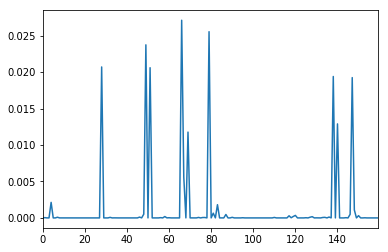

In [249]:
%matplotlib inline
ix = 50
pd.Series(pred[ix]).plot()

In [250]:
print np.where(bb.iloc[ix] > 0)
print np.where(pred[ix] >  (pred[ix].mean()))  # + 0.1 * pred[ix].std()))

(array([ 49,  66,  69,  79, 138, 140, 147]),)
(array([  4,  28,  49,  51,  66,  67,  69,  79,  83, 138, 140, 147]),)


In [251]:
print np.where(bb.iloc[ix] > 0)
print np.where(pred[ix] >  pred[ix][np.where(pred[ix] > np.mean(sorted(pred[ix])[:100]))].mean())  # (pred[ix].mean() + 0.75 * pred[ix].std()))

(array([ 49,  66,  69,  79, 138, 140, 147]),)
(array([ 28,  49,  51,  66,  67,  69,  79, 138, 140, 147]),)


In [245]:
bb.sum(axis=1).max()

9.0

In [902]:
be = trainingY[trainingY.sum(axis=1) == 2].head(100)
epred = kmodel.predict_proba(sc.transform(np.vstack(fv.ix[be.index])))

 32/100 [========>.....................] - ETA: 0s

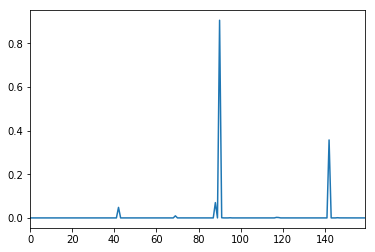

In [928]:
ix = 
pd.Series(epred[ix]).plot()

In [929]:
print np.where(be.iloc[ix] > 0)
print np.where(epred[ix] > (epred[ix].mean() + 1 * epred[ix].std()))

(array([42, 90]),)
(array([ 90, 142]),)


In [930]:
print np.where(be.iloc[ix] > 0)
print np.where(epred[ix] >  epred[ix][np.where(epred[ix] > 0.001)].mean())  # (pred[ix].mean() + 0.75 * pred[ix].std()))

(array([42, 90]),)
(array([ 90, 142]),)


In [939]:
epred[ix][(epred[ix] > 0.001)].mean()

0.19934334

In [200]:
pred.std(axis=1).mean()

0.00059701549

In [203]:
pred.mean(axis=1).mean()

0.00056228437

In [209]:
np.mean(sorted(pred[ix])[120:]) / np.mean(sorted(pred[ix])[:120])

65233468.0

In [205]:
pred[ix][np.where(pred[ix] > np.mean(sorted(pred[ix])[:100]))].mean()

1.2087504e-09

In [ ]:
test_df.ix['TestData_07579'].bodyText

In [ ]:
test_sub_df.ix['TestData_07579'][test_sub_df.ix['TestData_07579'] == 1]

In [293]:
def get_classes(pred, scale_param=0.75, min_thresh=0.05):
#     return np.where(pred > max((pred.mean() + scale_param * pred.std()), min_thresh))[0]
#     return np.where(pred > max((pred[pred > 0.001].mean()), min_thresh))[0]
#     return np.where(pred > max((pred.mean() + scale_param * pred.std()), min_thresh))[0]
    mx = pred[np.where(pred > np.mean(sorted(pred)[:100]))].mean()
    return np.where(pred > 0.04)[0]  # max(mx, 1e-9))[0]

In [294]:
%%time
# valid_test_feature_vec found below!

test_values = np.zeros([valid_test_feature_vec.shape[0], len(topics)])
for ix, pred in enumerate(kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec)))):
    for v in get_classes(pred, scale_param=0.75):
        test_values[ix][v] = 1

test_sub_df = pd.DataFrame(test_values, columns=sorted(topics), index=valid_test_feature_vec.index)
for i in test_feature_vec[test_feature_vec.isnull()].index:
    test_sub_df.ix[i] = np.zeros(len(topics))

5664/7578 [=====================>........] - ETA: 0sCPU times: user 712 ms, sys: 52 ms, total: 764 ms
Wall time: 621 ms


In [295]:
test_sub_df.sum(axis=1).sum()

10318.0

In [296]:
test_sub_df.astype(int).reset_index().rename(columns={'index': 'id'}).sort_values('id').to_csv('basic_nn_submission_full_training_data_0.6217_validation_accuracy_categorical_crossentropy_fixed_threshold_0.04.csv', index=False)

In [254]:
test_sub_df.sum(axis=1).sum()

74677.0

In [977]:
test_sub_df.sum(axis=1).sum()

34952.0

In [219]:
top_submission = pd.read_csv('basic_nn_submission_0.649_accuracy_multi_class.csv')

In [220]:
top_submission.set_index('id').sum(axis=1).sum()

14328

In [654]:
s = trainingY.head()[sorted(topics)]
s[s.notnull()]

,activism,afghanistan,aid,algerianhostagecrisis,alqaida,alshabaab,antiwar,arabandmiddleeastprotests,armstrade,australianguncontrol,...,unitednations,usguncontrol,values,warcrimes,warreporting,weaponstechnology,womeninbusiness,woolwichattack,worldmigration,zikavirus
2003b_TrainingData_00068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003b_TrainingData_00093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003b_TrainingData_00100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003b_TrainingData_00127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003b_TrainingData_00132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [657]:
np.where(s.values[0] == 1)

(array([76]),)

In [658]:
np.where(s.values == 1)

(array([0, 1, 2, 3, 4]), array([ 76,  76, 120,  76,  76]))

In [648]:
(kmodel.predict_proba(sc.transform(np.vstack(fv.head()))) > 0.00035).sum(axis=1)  #.argmax(axis=1)

5/5 [==============================] - 0s


array([20, 22,  4, 25, 15])

In [649]:
(kmodel.predict_proba(sc.transform(np.vstack(fv.head()))) > 0.002).argmax(axis=1)

5/5 [==============================] - 0s


array([  8,   6, 120,  66,   6])

In [660]:
p = (kmodel.predict_proba(sc.transform(np.vstack(fv.head()))) > 0.05)
np.where(p == 1)

5/5 [==============================] - 0s


(array([0, 0, 0, 1, 2, 3, 4]), array([ 34,  76,  98,  76, 120,  76,  76]))

In [520]:
p = (kmodel.predict_proba(sc.transform(np.vstack(fv.head()))) > 0.1)
np.where(p == 1)

5/5 [==============================] - 0s


(array([0, 1, 2, 2, 3, 3, 4, 4, 4, 4]),
 array([ 66,  41,  70, 131, 116, 125,  56,  60, 104, 125]))

In [623]:
pred = kmodel.predict_proba(sc.transform(np.vstack(fv.head(20000))))

19744/20000 [============================>.] - ETA: 0s

In [615]:
w = trainingY.sum(axis=1)
w[w > 4]
list(trainingY.index).index('2003b_TrainingData_06155')

1097

In [626]:
(pred.mean(axis=1) + pred.std(axis=1))

array([ 0.00528145,  0.00133199,  0.00523172, ...,  0.02053957,
        0.00371951,  0.02733777], dtype=float32)

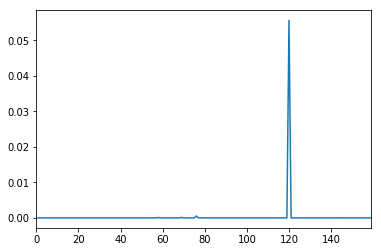

In [619]:
%matplotlib inline

d = pd.Series(pred[1097])
d.plot()

In [611]:
topic2vec_df.iloc[156]

mean_topic_word_vec    [0.0123051404953, 0.206452871983, -0.198155286...
topic_vec              [0.0357510633767, 0.139327511191, -0.103679254...
Name: womeninbusiness, dtype: object

In [84]:
term = 'carers'

In [85]:
sim = cosine_similarity(topic2vec_df.ix[term].topic_vec.reshape(1, -1), np.vstack(topic2vec_df.topic_vec.values))
for ix, i in enumerate(np.argsort(
    sim,
)[0][::-1]):
    print ix, topic2vec_df.index[i], sim[0][i]

0 carers 1.0
1 refugees 0.389063198824
2 localgovernment 0.37627013214
3 internallydisplacedpeople 0.375560678373
4 dataprotection 0.370663159257
5 retirementage 0.349338655313
6 womeninbusiness 0.343153673513
7 internetsafety 0.336918630343
8 humanrightsact 0.324758771034
9 firefighters 0.322804412595
10 stopandsearch 0.315840280675
11 criminaljustice 0.310002540059
12 humanrights 0.300932104298
13 mrsa 0.295473746111
14 aid 0.291590101467
15 humantrafficking 0.287508626751
16 tunisiaattack2015 0.284361925195
17 conflictanddevelopment 0.284118755384
18 arabandmiddleeastprotests 0.281470078213
19 police 0.273878529706
20 alshabaab 0.273604113167
21 internationalcriminaljustice 0.270351269405
22 drugs 0.268149501116
23 immigration 0.267945141669
24 organisedcrime 0.267628911836
25 australiansecurityandcounterterrorism 0.267393702181
26 peaceandreconciliation 0.266238809818
27 migration 0.264363322042
28 justiceandsecurity 0.262459314732
29 europeancourtofhumanrights 0.257851881452
30 hu

In [86]:
sim = cosine_similarity(topic2vec_df.ix[term].mean_topic_word_vec.reshape(1, -1), np.vstack(topic2vec_df.mean_topic_word_vec.values))

for ix, i in enumerate(np.argsort(
    sim
)[0][::-1]):
    print ix, topic2vec_df.index[i], sim[0][i]

0 carers 1.0
1 internallydisplacedpeople 0.407761171205
2 refugees 0.389063198824
3 localgovernment 0.363489016847
4 womeninbusiness 0.355865897416
5 dataprotection 0.350053618282
6 retirementage 0.326280335061
7 internetsafety 0.324591185233
8 firefighters 0.322804412595
9 justiceandsecurity 0.320618047704
10 undercoverpoliceandpolicing 0.304777436573
11 uksecurity 0.301790086298
12 drugspolicy 0.296293663022
13 mrsa 0.295473746111
14 aid 0.291590101467
15 humantrafficking 0.286392048106
16 humanitarianresponse 0.28126094325
17 ukcrime 0.281058875485
18 conflictanddevelopment 0.279718137845
19 humanrightsact 0.277735681261
20 europeancourtofhumanrights 0.276791697228
21 australiansecurityandcounterterrorism 0.274789561109
22 police 0.273878529706
23 criminaljustice 0.273558151121
24 drugs 0.268149501116
25 peaceandreconciliation 0.268063891638
26 immigration 0.267945141669
27 drugstrade 0.267841766765
28 internationalcourtofjustice 0.265763738898
29 migration 0.264363322042
30 freedom

In [83]:
for i, j in topic_train_index.items():
    print i, len(j)

helicoptercrashes 188
cobra 35
naturaldisasters 3760
protest 6736
retirementage 224
london 15138
biometrics 170
debate 18
police 8019
saudiarabia 1664
europeanarrestwarrant 87
paris 219
justiceandsecurity 152
alqaida 3194
earthquakes 872
extradition 904
dataprotection 1355
torture 1839
mumbaiterrorattacks 338
judiciary 421
taliban 2335
genevaconventions 84
warcrimes 1859
freedomofspeech 1401
carers 234
usguncontrol 496
alshabaab 149
southchinasea 34
australianguncontrol 3
philippines 569
slavery 660
warreporting 688
middleeastpeacetalks 219
refugees 2710
metropolitanpolice 2059
logistics 151
ukcrime 20516
energy 720
drones 579
lebanon 1375
chemicalweapons 344
malaysia 597
uksupremecourt 320
migration 366
humantrafficking 399
guncrime 2710
transport 11298
afghanistan 10033
defence 2467
antiwar 645
australiansecurityandcounterterrorism 92
bigdata 141
religion 16955
organisedcrime 843
somalia 1089
ebola 506
values 18
bostonmarathonbombing 178
espionage 815
osamabinladen 925
deflation 86
d

In [ ]:
import fasttext
from gensim.models.wrappers.fasttext import FastText
import os
from gensim.models import Word2Vec

# MODELS_DIR = 'models/'
# !mkdir -p {MODELS_DIR}

num_proc = 7
lr = 0.05
dim = 300
ws = 5
epoch = 6
minCount = 5
neg = 10
loss = 'ns'
t = 1e-4

# Same values as used for fastText training above
params = {
    'alpha': lr,
    'size': dim,
    'window': ws,
    'iter': epoch,
    'min_count': minCount,
    'sample': t,
    'sg': 1,
    'hs': 0,
    'negative': neg,
    'workers': num_proc,
}

ft_params = {
    'dim': dim,
    'neg': neg,
    'epoch': epoch,
    'thread': num_proc,
    'word_ngrams': 2,
    'silent':0,
    't': t,
    'loss': loss,
    'min_count': minCount,
    'ws': ws,
    'lr': lr,
    'thread': num_proc,
}

# %time fs_model = fasttext.skipgram('train_body_data-with_labels_False-retain_special_chars_False.with_test_data.csv', 'train_body_data-with_labels_False-retain_special_chars_False.with_test_data.csv.fasttext.model', **ft_params)

In [57]:
train_df.shape

(1600462, 3)

In [30]:
train_df.shape[0] == 1600462

True

In [212]:
with open('../data/TestData.json') as fl:
    data = json.load(fl)
    test_df = pd.DataFrame(data['TestData']).T

In [213]:
%%time
test_feature_vec = transform_text(test_df).map(lambda x: np.array([fs_model[w] for w in x.split()]).mean(axis=0))

/home/avsolatorio/ml-ai/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
/home/avsolatorio/ml-ai/local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CPU times: user 4min 50s, sys: 3.14 s, total: 4min 53s
Wall time: 5min 25s


In [214]:
valid_test_feature_vec = test_feature_vec[test_feature_vec.notnull()]

In [444]:
(kmodel.predict_proba(sc.transform(np.vstack(test_feature_vec.head(100)))) > 0.04).argmax(axis=1)

 32/100 [========>.....................] - ETA: 0s

array([ 61,  10,  29,   0,  56,  76,   0, 118,  29,  29,  41,   0,   4,
       117,   0,  60,  60,   4,   0,   0,   1,  61,   0,  90, 147,   2,
        29,   1, 117, 118,   4,  77, 104,   2,  56,  56,   4,  56,   0,
         0,  76,  56,  29,   0,   4,  56, 120, 120, 150,  56,   0,   0,
        56,  10,  56,  56,   0,  56,  56,  56, 120,   0,  78,  56,   0,
        76,  56,  56,  56,  56, 120,   0,   0,  56,  10,  56,  56,  56,
        56,  56,  10,  56,   0,  56,   0, 120, 120,   0,   0,   0, 117,
        56, 134, 118,  90,  56, 120,  56, 105,  32])

In [449]:
(kmodel.predict_proba(sc.transform(np.vstack(test_feature_vec.head(100)))) > 0.04).argmax(axis=1)

 32/100 [========>.....................] - ETA: 0s

array([ 61,  32,  29,   0,  56,  76,   0,   0,  29,  29,  41,   0,   4,
         0,   0,  60,  60,   4,   0,   0,   1,  61,   0,  90, 147,   2,
        29,   1,   0, 118,   4,  77, 104,  41,  56,  56,   4,  56,   0,
         0,  76,   4,  29,   0,   4,  56,   0,   0, 119,  56,  56,   0,
         4,  77,  56,  56,   0,  56,  56,  56,   0,   0,  77,  56,   0,
        77,  56,  56,  56,  56, 120,   0, 147,  56,  77,  56,  56,  56,
        56,  56,  32,  56,   0,  56,   0, 120,   0,   0,   0,   0, 146,
         0, 147, 118,  90,  56,  77,  56,  16,  32])

In [451]:
probe_sub = pd.DataFrame(columns=sample_sub.columns)
probe_sub['id'] = test_df.index.values

probe_sub[probe_sub.columns[1:]] = np.random.randint(2, size=(7581, 160))

,bodyText,topics,webPublicationDate
TestData_00001,"On 5 April, a two-year-old accidentally squeez...",[],01-01-2015
TestData_00002,Looking back at 2014 from the perspective of a...,[],01-01-2015
TestData_00003,A 22-year-old man arrested by police investiga...,[],01-01-2015
TestData_00004,The place where nine-year-old Najia Warshaga l...,[],01-01-2015
TestData_00005,"The annual Beaujolais contest, the showcase fo...",[],01-01-2015
TestData_00006,It would be comforting to think 2015 will brin...,[],01-01-2015
TestData_00007,Just after 7pm on the evening of Saturday 28 M...,[],02-01-2015
TestData_00008,Police are hunting gunmen who fired at a crowd...,[],02-01-2015
TestData_00009,The US has imposed economic sanctions against ...,[],02-01-2015
TestData_00010,Sony Entertainment is unable to confirm that h...,[],02-01-2015


In [493]:
res = (kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec))) > 0.04)
np.where(res == 1)

7360/7578 [============================>.] - ETA: 0s

(array([   0,    1,    1, ..., 7577, 7577, 7577]),
 array([ 61,  32,  44, ...,  78, 136, 150]))

In [489]:
test_values = np.zeros([valid_test_feature_vec.shape[0], len(topics)])
for ix, v in enumerate((kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec))) > 0.04).argmax(axis=1)):
    test_values[ix][v] = 1

7488/7578 [============================>.] - ETA: 0s

In [505]:
test_values = np.zeros([valid_test_feature_vec.shape[0], len(topics)])
for ix, v in zip(*np.where((kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec))) > 0.04))):
    test_values[ix][v] = 1

7200/7578 [===========================>..] - ETA: 0s

In [627]:
test_values = np.zeros([valid_test_feature_vec.shape[0], len(topics)])
for ix, v in zip(*np.where((kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec))) > 0.002))):
    test_values[ix][v] = 1

7328/7578 [============================>.] - ETA: 0s

In [628]:
test_values = np.zeros([valid_test_feature_vec.shape[0], len(topics)])
for ix, v in zip(*np.where((kmodel.predict_proba(sc.transform(np.vstack(valid_test_feature_vec))) > 0.002))):
    test_values[ix][v] = 1

test_sub_df = pd.DataFrame(test_values, columns=sorted(topics), index=valid_test_feature_vec.index)
for i in test_feature_vec[test_feature_vec.isnull()].index:
    test_sub_df.ix[i] = np.zeros(len(topics))

In [629]:
test_sub_df.astype(int).reset_index().rename(columns={'index': 'id'}).sort_values('id').to_csv('basic_nn_submission_0.7271_accuracy_multi_class_2003-2005_training_data.csv', index=False)

In [50]:
probe_sub = pd.DataFrame(columns=sample_sub.columns)
probe_sub['id'] = test_df.index.values

In [63]:
probe_sub[probe_sub.columns[1:]] = np.random.randint(2, size=(7581, 160))

In [65]:
probe_sub.to_csv('probe_submission.csv', index=False)

NameError: name 'test_df' is not defined

In [119]:
(491.20 - 255.20) / 60

3.933333333333333